# Reproducing a Graph from _The Economist_

## This is Our Goal 

![Economist](https://cloud.githubusercontent.com/assets/22850980/24850224/0dedd2e8-1d84-11e7-88e6-4137b3f662fb.jpg)


## Getting Started

First we need to load the `library()` requirements.

In [3]:
library(ggplot2)
library(ggrepel)
library(grid)

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Warning message:
“package ‘ggrepel’ was built under R version 3.3.2”

Next, we need to set the working directory, if necessary, and load in our data.

In [2]:
getwd()
setwd("/Users/Macbook/Desktop/My_Projects")
economist <- read.csv("Rgraphics/dataSets/EconomistData.csv")

[1] "/Users/Macbook"

Before I start messing with the data at all, I always look at the `head()`.

In [5]:
head(economist)

X,Country,HDI.Rank,HDI,CPI,Region
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia


## Data Wrangling

All I did here was to get the $R^2$ line. I think this is what they did. I could be wrong.

In [4]:
pred <- predict(lm(HDI~ log(CPI), data = economist))

Looking at the graph and the head of our data, I see no clear indication of why they chose to label certain points. So I handpicked these out and stored them in a vector called `pointsToLabel`. After that, I used `factor` to match up the corresponding labels to what _The Economist_ actually labeled them as.

***
Example:

From the Region column, "Asia Pacific" corresponds to "Asia & Oceania"
***

In [13]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

economist$Region <- factor(economist$Region,
                     levels = c("EU W. Europe",
                                "Americas",
                                "Asia Pacific",
                                "East EU Cemt Asia",
                                "MENA",
                                "SSA"),
                     labels = c("OECD",
                                "Americas",
                                "Asia &\nOceania",
                                "Central &\nEastern Europe",
                                "Middle East &\nNorth Africa",
                                "Sub-Saharan\nAfrica"))

## Plotting 

Let's start off small and build our way up. The documentation for `ggplot` gives us this general outline. 
 ***
` ggplot(data, aes(x, y, <other aesthetics like color, fill, etc.>))`
***

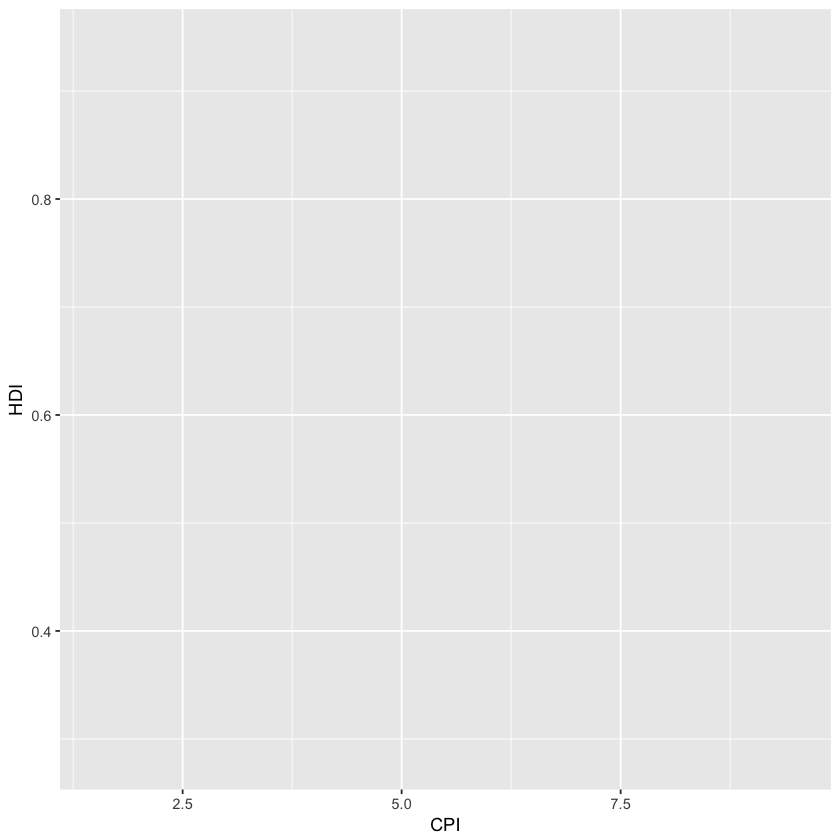

In [14]:
ggplot(economist, aes(x = CPI, y = HDI))

Perfect. This is what we wanted. We are setting ourselves up for greatness. Let's start adding our scatterplot and linear model.

`geom_smooth()` using method = 'loess'


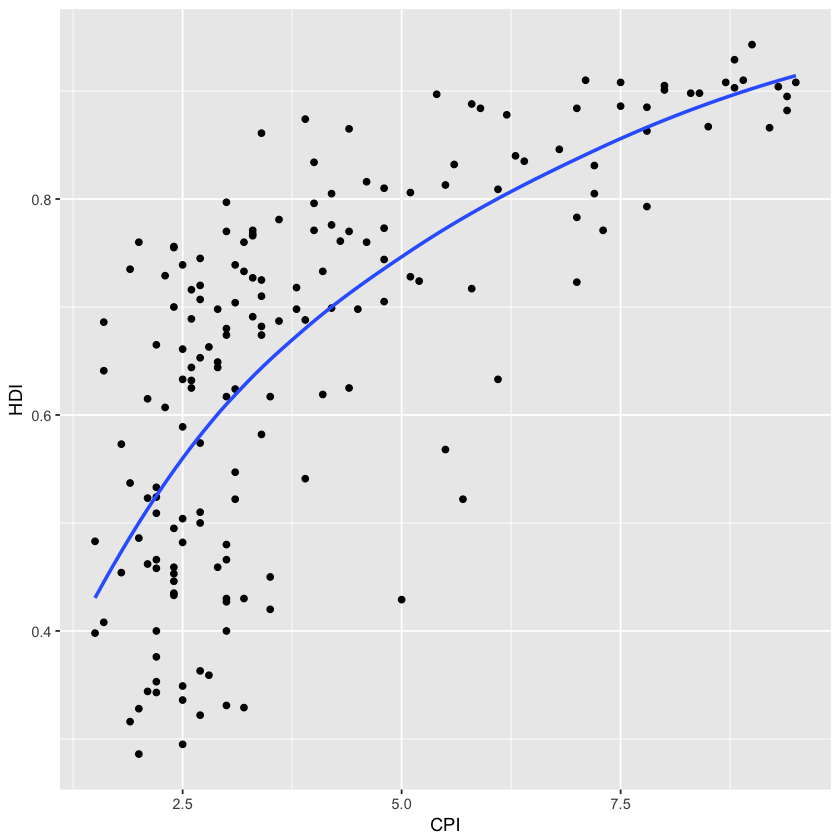

In [20]:
ggplot(economist, aes(x = CPI, y = HDI))+ geom_point()+ geom_smooth(aes(y = pred))    

This is good. But, this looks so basic it hurts. I rather look at the blank canvas of before because at least I can visualize a pretty plot. Let's take advantage of `ggplot` geometries to specify aesthetics like the shape, color, fill, line color, line weight, etc.

`geom_smooth()` using method = 'loess'


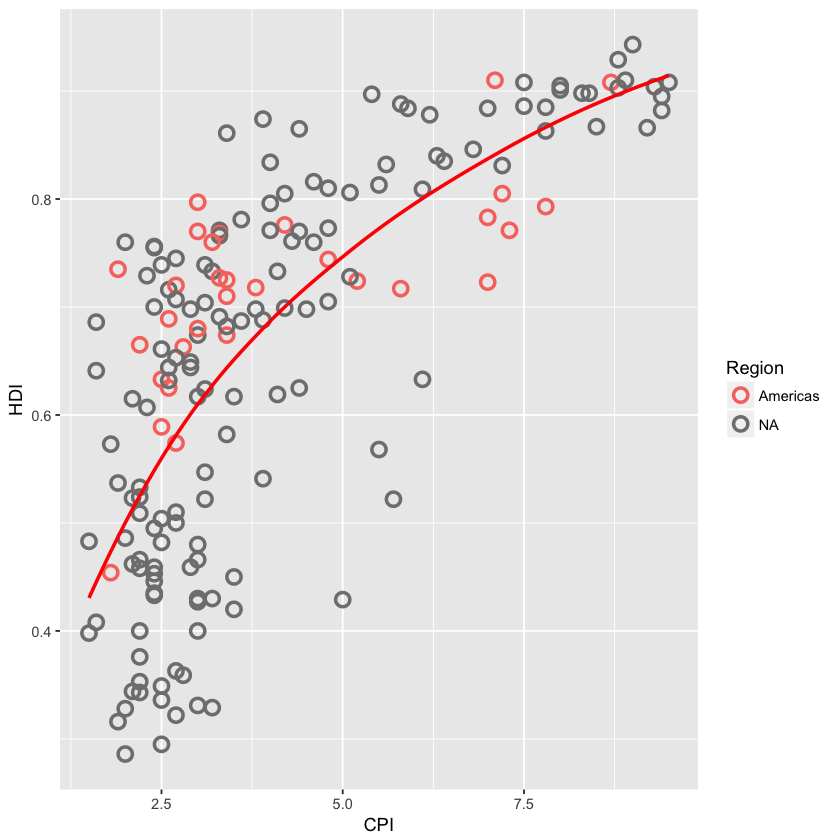

In [22]:
 ggplot(economist, aes(x = CPI, y = HDI))+ geom_point(aes(color = Region),
                    shape = 1, 
                    fill = 4,
                    stroke = 1.5,
                    alpha = 1,
                    size = 3) +
  geom_smooth(aes(y = pred), color = "red", linetype = 1, weight = 2, fullrange=TRUE)

This is atrocious. The legend, tells me nothing. The colors of the circles, tells me nothing. If I saw this in a magazine, I would think they are plotting the Consumer price index to the Human Death Index, if that's a thing, and I colored it according to region. Either you are from the Americas or you are not applicable. Let's add some labels to see what's going on.

`geom_smooth()` using method = 'loess'


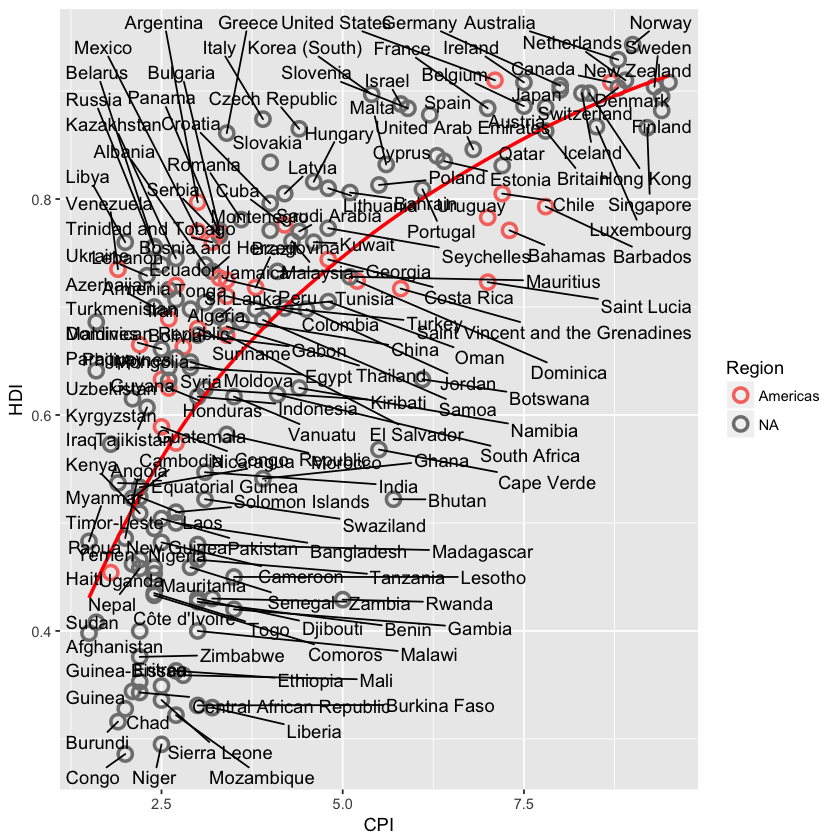

In [24]:
 ggplot(economist, aes(x = CPI, y = HDI))+ geom_point(aes(color = Region),
                    shape = 1, 
                    fill = 4,
                    stroke = 1.5,
                    alpha = 1,
                    size = 3) +
  geom_smooth(aes(y = pred), color = "red", linetype = 1, weight = 2, fullrange=TRUE)+ geom_text_repel(aes(label=Country))

So, let's start off with the good. 

__The Good__
* I now know that the dots correspond to countries.

__The Bad__
* Come up with your own insult. I'm done.


This is where we get on Google and start asking some questions. This is the perfect example of shooting yourself in the foot with too much information. Find a balance. The people at _The Economist_ probably had this exact same graph at some point. They did not have any foresight like us. They had no idea what the end product would be. This is where the real work starts.

## Where are we? 
***
![Economist](https://cloud.githubusercontent.com/assets/22850980/24850224/0dedd2e8-1d84-11e7-88e6-4137b3f662fb.jpg)

## Fine Tuning

_Didn't we pick out certain countries to label?_
* Yes! Let's put that in there using `subset()`

_I still don't know what the axis labels are._
* Let's put that in there using `scale_x_continuous` and `scale_y_continuous`

_We have not broken up the axis yet either._
* Perfect timing since we just used `scale_x_continuous`and `scale_y_continuous`. We can put in the optional arguments `breaks` and `limits` 

_Last request. I promise. But, can we add a title? And can we get rid of the ugly gray background, if possible?
* That was two requests, but yes two both of them. For the title, we can use `ggtitle()`. And, for the ugly gray background, `theme_minimal()`. Remember, for these two, we are layering. Therefore, we have to use the "+" for these. 

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 10 rows containing missing values (geom_smooth).”

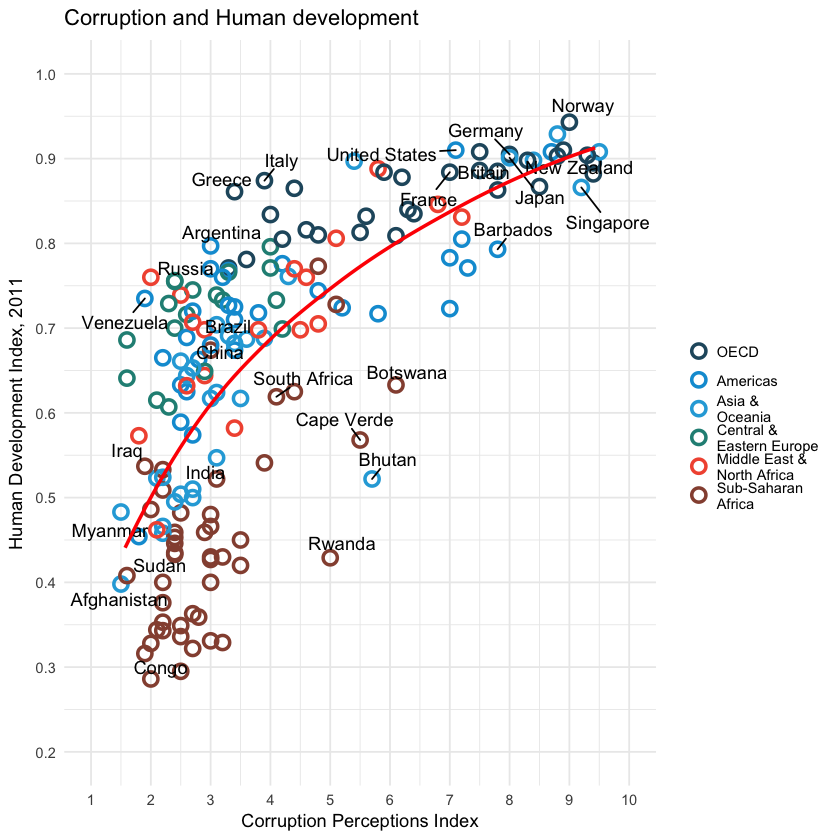

In [6]:
ggplot(economist, aes(x = CPI, y = HDI))+ geom_point(aes(color = Region),
                    shape = 1, 
                    fill = 4,
                    stroke = 1.5,
                    alpha = 1,
                    size = 3)+  
  geom_text_repel(aes(label=Country), data = subset(economist, Country %in% pointsToLabel), force = 10) +
  geom_smooth(aes(y = pred), color = "red", linetype = 1, weight = 2, fullrange=TRUE) +
  scale_x_continuous(name = "Corruption Perceptions Index", breaks = seq(1, 10, by = 1), limits = c(1, 10))+ 
  scale_y_continuous(name = "Human Development Index, 2011", breaks = seq(0, 1.0, by = 0.1), limits = c(0.2, 1.0))+
  scale_color_manual(name = "",
                     values = c("#24576D",
                                "#099DD7",
                                "#28AADC",
                                "#248E84",
                                "#F2583F",
                                "#96503F")) +
  ggtitle("Corruption and Human development") +
  theme_minimal() 

This is leaps and bound better than before. If you are satisfied, you can stop here. The last chunk is mainly trial and error when it comes to positioning the legend, title, axis attributes, and various other minor changes. I suggest playing around with different values to see what changes the last bits of the graph. 

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 10 rows containing missing values (geom_smooth).”

[1] 0.5212859

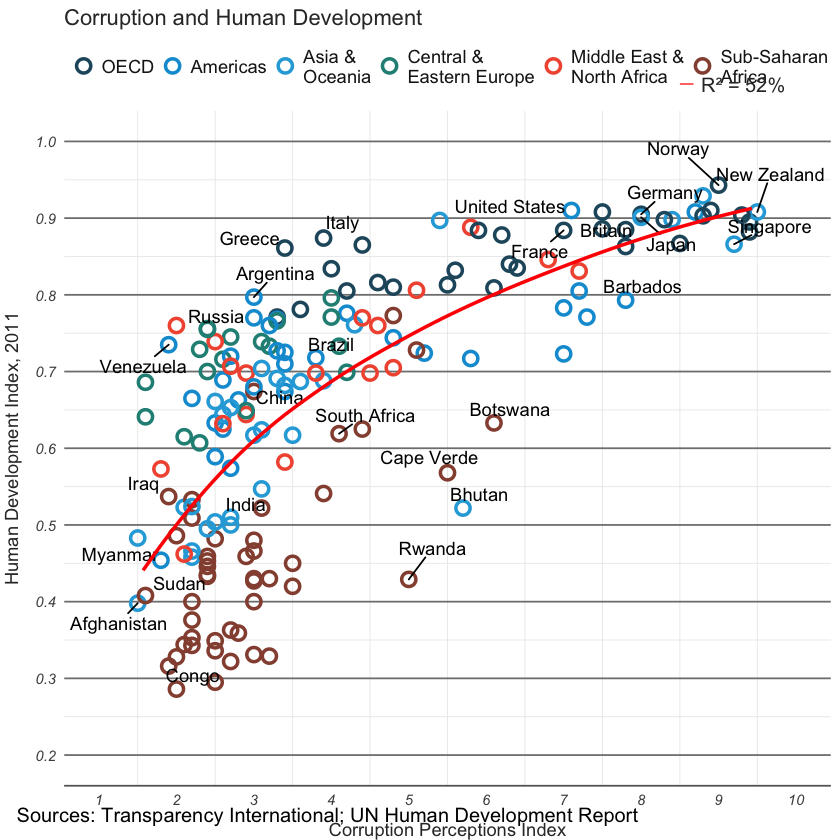

In [9]:
ggplot(economist, aes(x = CPI, y = HDI))+
geom_point(aes(color = Region),
                    shape = 1, 
                    fill = 4,
                    stroke = 1.5,
                    alpha = 1,
                    size = 3)+  
  geom_text_repel(aes(label=Country), data = subset(economist, Country %in% pointsToLabel), force = 10) +
  geom_smooth(aes(y = pred), color = "red", linetype = 1, weight = 2, fullrange=TRUE) +
  scale_x_continuous(name = "Corruption Perceptions Index", breaks = seq(1, 10, by = 1), limits = c(1, 10))+ 
  scale_y_continuous(name = "Human Development Index, 2011", breaks = seq(0, 1.0, by = 0.1), limits = c(0.2, 1.0))+
  scale_color_manual(name = "",
                     values = c("#24576D",
                                "#099DD7",
                                "#28AADC",
                                "#248E84",
                                "#F2583F",
                                "#96503F")) +
  ggtitle("Corruption and Human Development") +
  theme_minimal() + # start with a minimal theme and add what we need
  theme(text = element_text(color = "gray20"),
        legend.position = "top", # position the legend in the upper left 
        legend.direction = "horizontal",
        legend.justification = c(0.1,0), # anchor point for legend.position.
        legend.text = element_text(size = 11, color = "gray10"),
        axis.text = element_text(face = "italic"),
        axis.title.x = element_text(vjust = -1), # move title away from axis
        axis.title.y = element_text(vjust = 2), # move away for axis
        axis.ticks.y = element_blank(), # element_blank() is how we remove elements
        axis.line = element_line(color = "gray40", size = 0.5),
        axis.line.y = element_blank(),
        panel.grid.major = element_line(color = "gray50", size = 0.5),
        panel.grid.major.x = element_blank()
  ) + guides(colour = guide_legend(nrow = 1)) # forces legend to be in a single line
  



(mR2 <- summary(lm(HDI ~ log(CPI), data = economist))$r.squared)


grid.text("Sources: Transparency International; UN Human Development Report",
          x = .02, y = .03,
          just = "left",
          draw = TRUE)
grid.segments(x0 = 0.81, x1 = 0.825,
              y0 = 0.90, y1 = 0.90,
              gp = gpar(col = "red"),
              draw = TRUE)
grid.text(paste0("R² = ",
                 as.integer(mR2*100),
                 "%"),
          x = 0.835, y = 0.90,
          gp = gpar(col = "gray20"),
          draw = TRUE,
          just = "left")
